# TASK-1 Unsupervised Learning

**ZAEEM AHMED**

## Importing Libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Read

In [14]:
student_df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
x = student_df[["Hours"]]
y = student_df["Scores"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

## Linear Regression Model

### Training Model

In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
m = lr.coef_
b = lr.intercept_
print("Slope: ",m)
print("y-intercept: ",b)
line = m*x + b
print(line[:5])

Slope:  [9.84035847]
y-intercept:  2.975857838961389
       Hours
0  27.576754
1  53.161686
2  34.465005
3  86.618905
4  37.417112


### Testing Model

In [18]:
y_pred = lr.predict(x_test)

### Comparision Of Predictions

In [19]:
comparision = pd.DataFrame({"Original":y_test, "Predicted":y_pred})
comparision

,Original,Predicted
3,75,86.618905
12,41,47.257471
15,95,90.555048
20,30,29.544826
4,30,37.417112


### Model Evaluation

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error of Model is: ", mse)
print("Mean Absolute Error of Model is: ", mae)

Mean Squared Error of Model is:  1183.5178511698155
Mean Absolute Error of Model is:  26.69389716154974


## Plotting Linear Regression Model

### Training Data

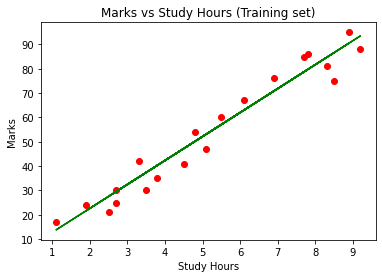

In [23]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Marks vs Study Hours (Training set)")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

### Testing Data

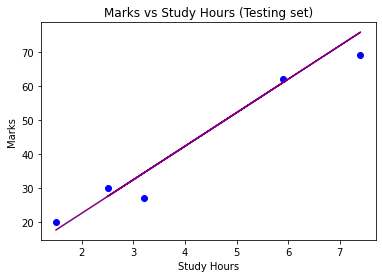

In [25]:
plt.scatter(x_test, y_test, color = "blue")
plt.plot(x_test, lr.predict(x_test), color = "purple")
plt.title("Marks vs Study Hours (Testing set)")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

## Predicting Student Marks For Study Hours of 9.25 Per Day

In [32]:
marks = lr.predict([[9.25]])
print("Predicted Marks of student studying 9.25 hours per day are: ", marks[0])

Predicted Marks of student studying 9.25 hours per day are:  93.99917368044434
